<a href="https://colab.research.google.com/github/Kumarisimran626/Netfilx-Movies-TV-shows-clustering/blob/main/S_K_Netfilx_Movies_%26_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Project-Title : Netfilx Movies & TV shows clustering</u></b>


#<b/>Project Type - Unsupervised ML</b>


#<b/>Contribution - Individual
###Name - Simran Kumari</b>

# **Project Overview -**

Clustering Netflix's extensive collection of movies and TV shows is aimed at categorizing them into distinct groups based on common characteristics, such as genre, themes, and user preferences. This clustering process enhances user content discovery. Here's a brief overview of how this clustering project operates:

1. **Data Gathering**: Netflix accumulates comprehensive data on its movie and TV show offerings, encompassing metadata like genre, director, cast, release year, user ratings, and viewing history.

2. **Feature Selection**: To facilitate effective clustering, pertinent features are extracted from the data. These features may encompass genre, user ratings, viewer demographics, keywords derived from descriptions, and more.

3. **Reducing Dimensionality**: Dealing with high-dimensional data can be intricate, so techniques like Principal Component Analysis (PCA) or t-SNE are employed to reduce the data's complexity while preserving vital information.

4. **Choosing Clustering Algorithms**: Various clustering algorithms are available, including K-Means, Hierarchical Clustering, and DBSCAN. The selection of the algorithm depends on the data and the desired outcomes. For instance, K-Means is a popular choice for numerical data, while Hierarchical Clustering can establish a hierarchy of clusters.

5. **Clustering Procedure**: The chosen clustering algorithm is applied to the feature-extracted and dimensionality-reduced data. This algorithm assembles similar movies and TV shows into clusters based on their shared features.

6. **Evaluating Clusters**: The quality of the clusters is assessed using metrics like the silhouette score or elbow method. This step aids in determining the optimal number of clusters and the efficacy of the clustering.

7. **Labeling**: Once clusters are formed, they can be labeled to provide users with insights into the content within each cluster. For instance, clusters may be labeled as "Action Films," "Romantic Comedies," "Science Fiction TV Shows," and so on.

8. **User Personalization**: Netflix may also take into account individual user viewing histories and preferences when presenting clusters. This personalization tailors clusters to individual users, increasing the likelihood of recommending content aligned with their tastes.

9. **Presentation and Recommendations**: The clustered content is then showcased to users on the Netflix platform, either as curated lists, personalized recommendations, or as part of a broader recommendation system.

10. **Feedback Loop**: Netflix continues to amass data on user interactions, including watched content and user ratings. This feedback loop serves to fine-tune the clustering and recommendation algorithms over time, enhancing the accuracy of recommendations.

In summary, the clustering of Netflix's movies and TV shows is all about organizing similar content to simplify user content discovery and enhance tailored recommendations. This process hinges on data analysis, machine learning, and user feedback to continuously refine the recommendation system.

#<b/>GitHub Link-

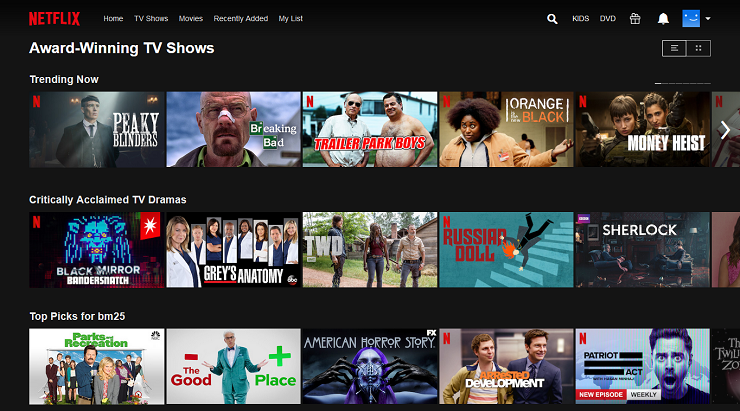

#<b/>Problem Statement</b>

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

##<b/>Important steps that required in this project</b>

1) EDA(Exploratory Data Analysis)

2) Here, we understanding in different countries what type of content is accessible.

3) Is Netflix has increasingly focusing on TV rather than movies in recent years.

4) Clustering similar content by matching text-based features


##<b/>Attribute Information</b>

1) **show_id :**  Unique ID for every Movie / Tv Show

2) **type :**  Identifier - A Movie or TV Show

3) **title :**  Title of the Movie / Tv Show

4) **director :**  Director of the Movie

5) **cast :**  Actors involved in the movie / show

6) **country :**  Country where the movie / show was produced

7) **date_added :**  Date it was added on Netflix

8) **release_year :**  Actual Releaseyear of the movie / show


9) **rating :**  TV Rating of the movie / show

10) **duration :**  Total Duration - in minutes or number of seasons

11) **listed_in :**  Genere

12) **description:**  The Summary description



# **Let's Begin !**

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset Loading
df = pd.read_csv('/content/drive/MyDrive/Netflix /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

## First View of Dataset

In [5]:
# First look of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Bottom rows of dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# Shape of data
rows=df.shape[0]
columns=df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 7787
Number of columns in dataset are 12


In [8]:
# Columns of data
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#<b/>Data processing</b>

###Duplicate values

In [10]:
# Duplicate Values
df.duplicated().sum()

0

#### Function for extracting complete information of all columns in data set. Information as follows
* Missing values
* Percentage of missing values
* unique value

In [11]:
#Viewing null value
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Figure size 1200x800 with 0 Axes>

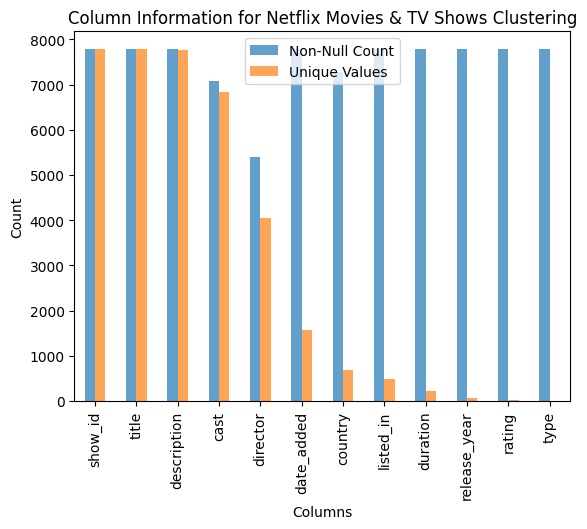

In [12]:
# Define the Complete_columns_info function
def Complete_columns_info(df):
    # Create a DataFrame to store the column information
    column_info = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Unique Values': df.nunique()
    })

    # Sort the DataFrame by the number of unique values (optional)
    column_info = column_info.sort_values(by='Unique Values', ascending=False)

    # Create a bar plot
    plt.figure(figsize=(12, 8))
    column_info.plot(kind='bar', alpha=0.7)
    plt.title('Column Information for Netflix Movies & TV Shows Clustering')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Call the function to visualize column information for your clustering dataset
Complete_columns_info(df)


In [13]:
# total nulll values
df.isnull().sum().sum()

3631

The dataset contains a total of 3,631 null values and 2,389 null value in director column, 718 and 507 in  the cast and country column and 7 in the rating column. It is necessary to address these null values .

In [14]:
# Handling null values
df['cast'].fillna(value='No Cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [15]:
# 'date_added' and 'rating' contains an unnecessary portion of the data so we will drop them from dataset.
df.dropna(subset=['date_added', 'rating'], inplace = True)

In [16]:
#droping director column
df.drop(['director'],axis=1,inplace=True)

In [17]:
# checking null values
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#<b/>EDA(Exploratory Data Analysis)

###<b/>1. Count of Movies and Tv Shows</b>

In [18]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [19]:
# visualization code

labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]

# Colors
colors = ['#bf00bf', '#00bfbf	']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

<b/>1. Why did you pick the specific chart?</b>

**Answer Here-**

This specific chart is a pie chart. I take this chart because it is useful or more effective in visualizing the distribution of categorical data. Here, the chart is used to represent the types of content watched on netfilx, which are categorized as 'Movie' and 'Tv Shows'.

<b/>2. What is/ are the insight(s) found from the chart?</b>

**Answer Here-**

The insight from the chart is the count of movies and Tv shows, here Tv shows constitue the majority that is 69.1%, while movies have smaller percentage that is 30.9%.


<b/>3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.</b>

**Answer Here-**

The data indicates a clear preference for TV shows over movies, with a significantly higher percentage of 69.1% compared to the lower percentage of 30.9% for movies. This suggests that people tend to enjoy shorter formats like TV shows rather than investing their time in longer movies that may be less engaging.




###<b/>2. In which year maximum no. of Movies released?</b>

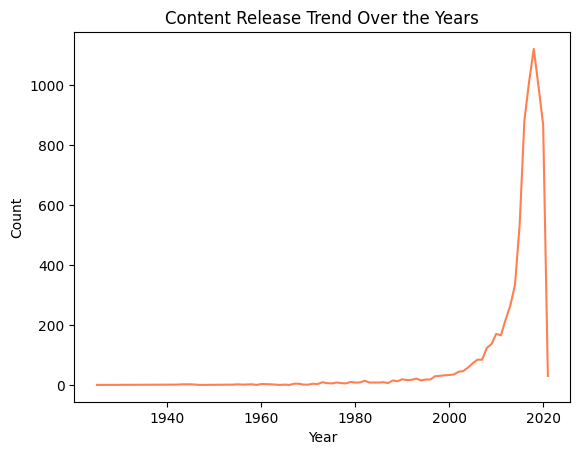

In [20]:
# Content Release Trend Over the Years
release_trend = df["release_year"].value_counts().sort_index()
release_trend.plot(kind="line",color='coral')
plt.title("Content Release Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<b/>1. Why did you pick the specific chart?</b>

**Answer Here-**

I chose a line chart to visualize the content release trend over the years because it effectively displays the changes and patterns in content releases over time.

<b/>2. What is/are the insight(s) found from the chart?</b>

**Answer Here-**

The insights gained from the chart include understanding the trend in content releases over the years. By observing the line chart, we can identify any increasing or decreasing patterns.


<b/>3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.</b>

**Answer Here-**

The gained insights can potentially help to create a positive business impact. Understanding the content release trend over the years can inform content planning, scheduling, and strategic decision-making. It can help identify popular release periods, seasonality patterns, or gaps in content releases.

# ##<b/>3. In which category get highest ratings of movies released?</b>

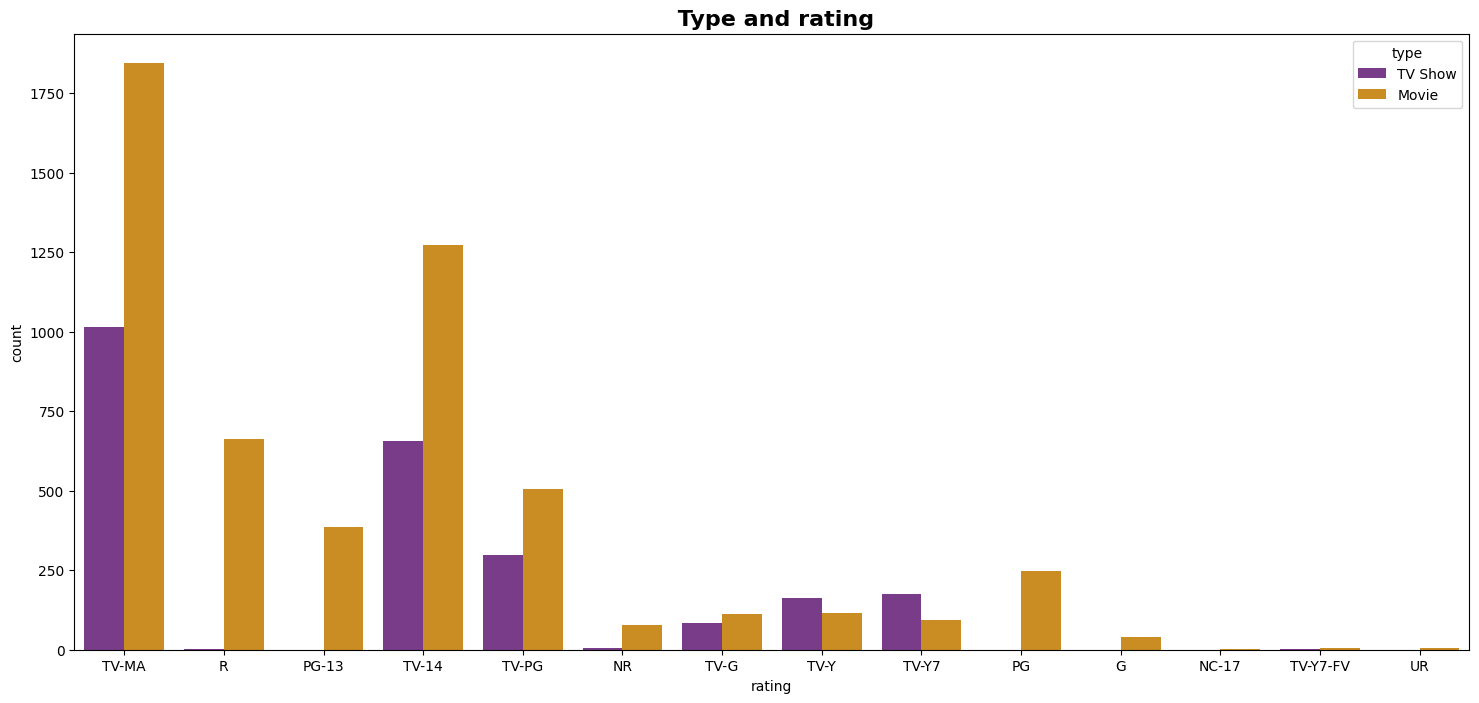

In [21]:
# Rating
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=df,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

TV-MA get more ratings means the most of the content is for adult oriented.

###<b/>4. Which genere is most popular?</b>

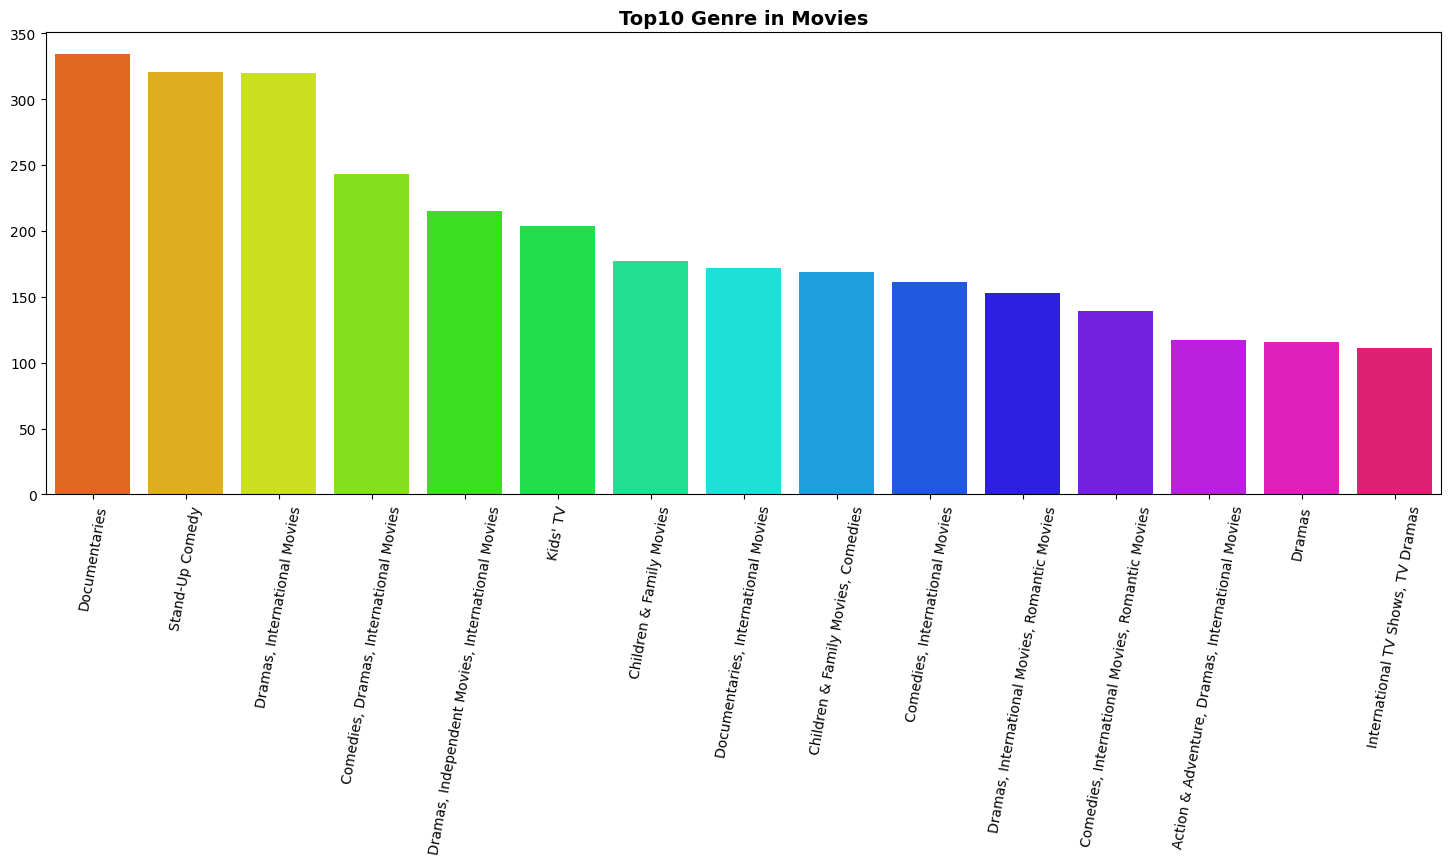

In [22]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='14',fontweight="bold")
plt.show()

<b/>From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies.</b>

##<b/>5. Top Actor on netflix</b>

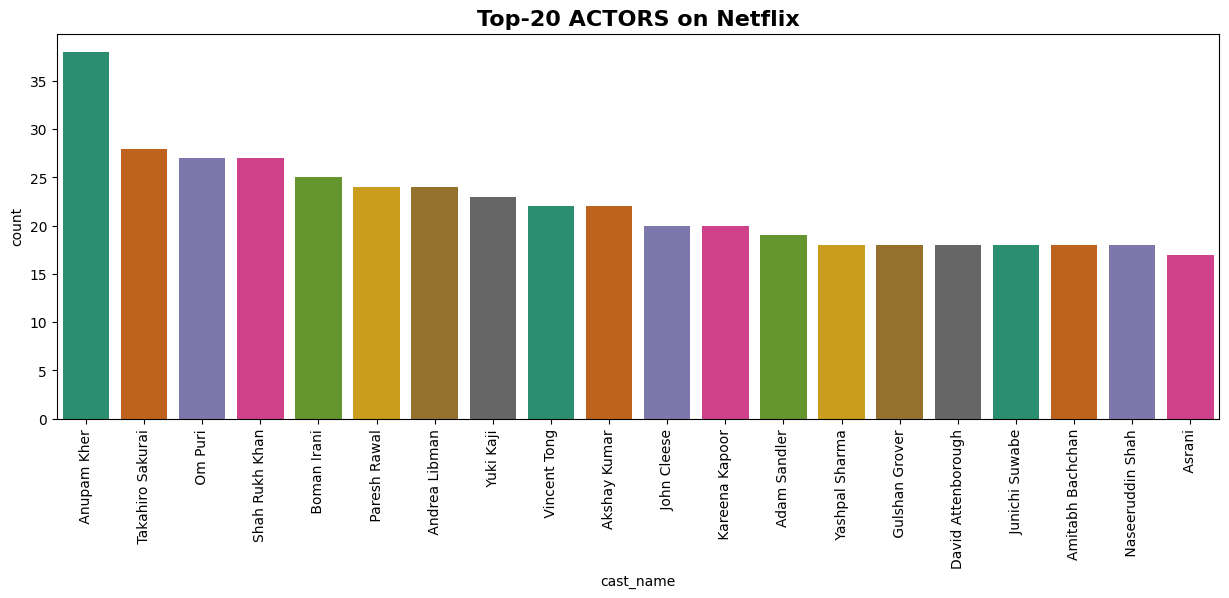

In [23]:
# Top 20 actors netflix
df['cast_name'] = df['cast'].apply(lambda x :  x.split(','))
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

<b/>The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.</b>

### <b/>6. Top 10 countries with the most content.</b>

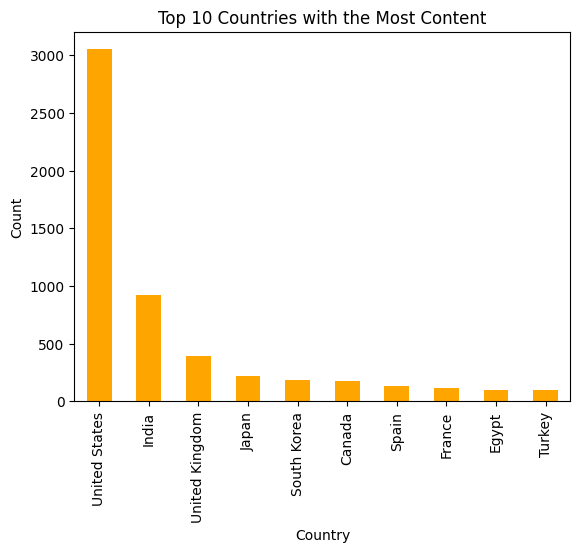

In [24]:
# Bar Chart - Top 10 Countries with the Most Content
top_countries = df["country"].value_counts().head(10)
top_countries.plot(kind="bar",color='orange')
plt.title("Top 10 Countries with the Most Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

<b/>1. Why did you pick the specific chart?</b>

I chose a bar chart to showcase the top 10 countries with the most content because it allows for a clear visual comparison of the content count for each country.

<b/>2. What is/are the insight(s) found from the chart?</b>

By examining the heights of the bars, we can identify the United States has the highest number of content offerings

<b/>3. Will the gained insights help creating a positive business impact?</b>

<b/>Are there any insights that lead to negative growth? Justify with specific reason.</b>

The gained insights can help create a positive business impact. Understanding which countries have the most content can inform business decisions such as content acquisition, localization efforts, and marketing strategies. It can provide insights into audience preferences, popularity of content from different regions, and potential target markets for expansion.

In [25]:
#top_two countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country

,index,country
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


<BarContainer object of 11 artists>

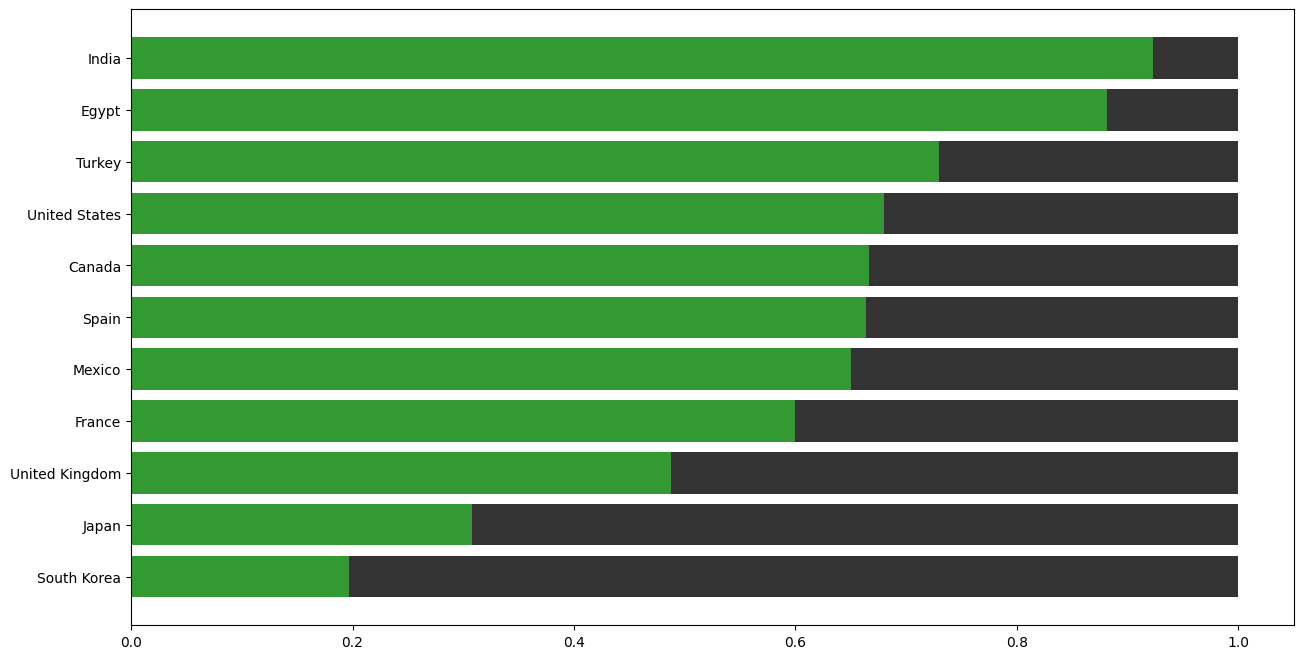

In [26]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='green', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

<b/>India contain highest number of movies on netflix.</b>

###<b/> 7.  Which Category has highest ratings?</b>

In [27]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [28]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [29]:
# type should be a categorical
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...",Adults
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",Teens
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",[Nasty C],Adults
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,"[Adriano Zumbo, Rachel Khoo]",Older Kids


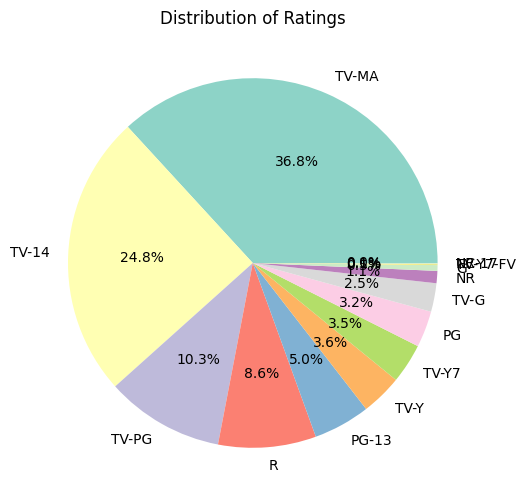

In [30]:
custom_palette = sns.color_palette("Set3", len(df["rating"].unique()))  # You can choose a different palette
plt.figure(figsize=(8, 6))
sns.set_palette(custom_palette)
df["rating"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Ratings")
plt.ylabel("")
plt.show()


<b/>1. Why did you pick the specific chart?</b>

**Answer Here-**

I chose a pie chart to represent the distribution of ratings because it provides a visual representation of the proportions or percentages of each rating category.Pie charts are effective for showcasing the composition of a whole in terms of its parts.

<b/>2. What is/are the insight(s) found from the chart?</b>

**Answer Here-**

The size of each slice in the pie chart represents the proportion or percentage of content in each rating category. High number of TV-MA rating.


<b/>3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.</b>

**Answer Here-**


Understanding the distribution of ratings can provide valuable information about the audience's preferences and help in content curation and decision-making processes. For example, if a significant portion of the content falls under a particular rating category (e.g., TV-MA have 36.8% rating), it may indicate that there is a demand for mature or adult-oriented content.

In [31]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

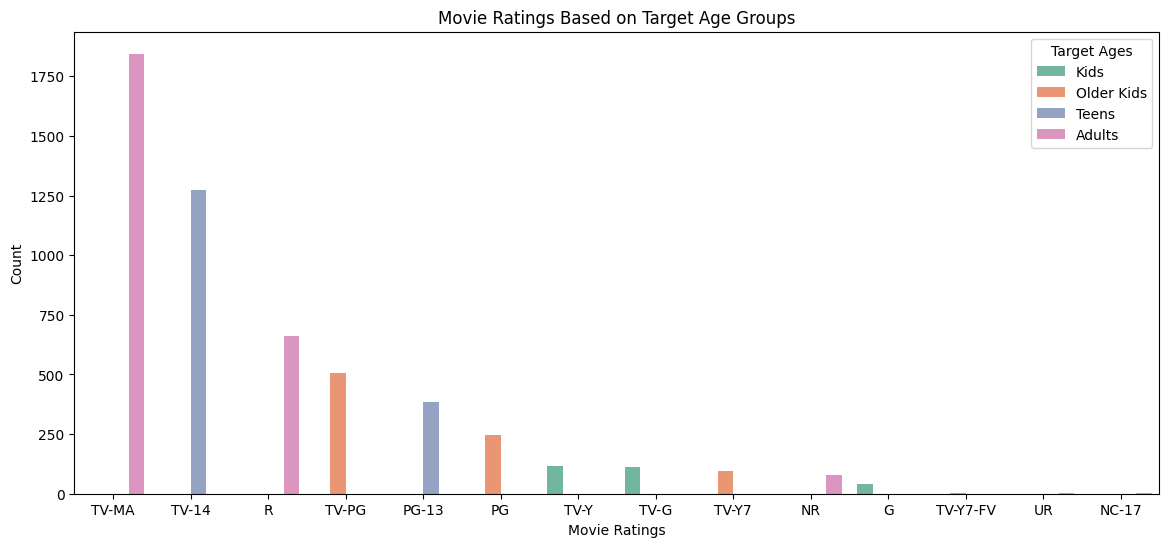

In [32]:
#Movie Ratings based on Target Age Groups
custom_palette = sns.color_palette("Set2")
plt.figure(figsize=(14, 6))
plt.title('Movie Ratings Based on Target Age Groups')
sns.countplot(x=movies['rating'], hue=movies['target_ages'], data=movies,
              order=movies['rating'].value_counts().index, palette=custom_palette)
plt.legend(title='Target Ages', loc='upper right')
plt.xlabel('Movie Ratings')
plt.ylabel('Count')
plt.show()


- Here we visualize that, in both cases TV-MA has the highest ratings for Tv shows. That indicates the rating cateogory wit the most content targeted to adult audiences.

###<b/>8)Which Season has the maximum duration?</b>

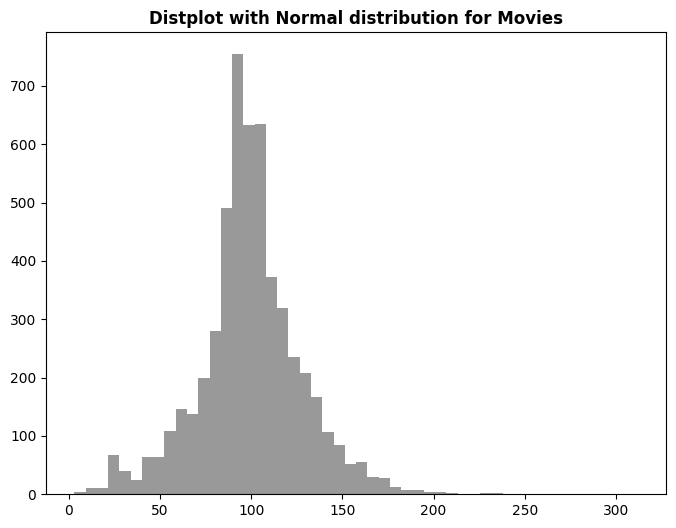

In [33]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(8,6))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['black'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

<b/>Q1: Why I choose distplot as a specific chart?</b>

Using a distplot for this particular analysis is not the best choice because it's designed for visualizing the distribution of a single variable. Since you want to compare different seasons based on their maximum duration, a bar chart or similar categorical chart would be more appropriate.

<b/>Q2: What are the insights found from a distplot chart?</b>

If you were to use a distplot to visualize the distribution of a continuous variable (e.g., movie or TV show durations), you could gain insights into how the durations are distributed. For example, you might find that most content falls within a certain duration range, or you might identify outliers with exceptionally long or short durations.

<b/>Q3: Will the gained insights help create a positive business impact?</b>

The impact of insights gained from a distplot or any other type of data visualization depends on the context and the specific insights themselves. Here's how it could potentially impact a business:

**Content Planning:** If you discover that the majority of successful Netflix content falls within a certain duration range, this insight could inform content planning decisions. For example, the business might focus on creating more content that aligns with this preferred duration.

**User Engagement:** Understanding the distribution of content durations can help optimize user engagement. For instance, if users tend to favor shorter content, this might influence the recommendation algorithms to suggest shorter shows or movies.

**Advertising and Pricing:** For businesses that use advertising or subscription pricing models, knowing the distribution of content durations can impact ad placement strategies or pricing tiers.

However, these insights would apply more directly if you were analyzing content duration distribution using a distplot or a similar chart. To determine which season has the maximum duration, you should use a categorical chart (e.g., a bar chart) as mentioned in the previous response.


###**In distplot, it shows the most of the movies have duration of between 50 to 150**






<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

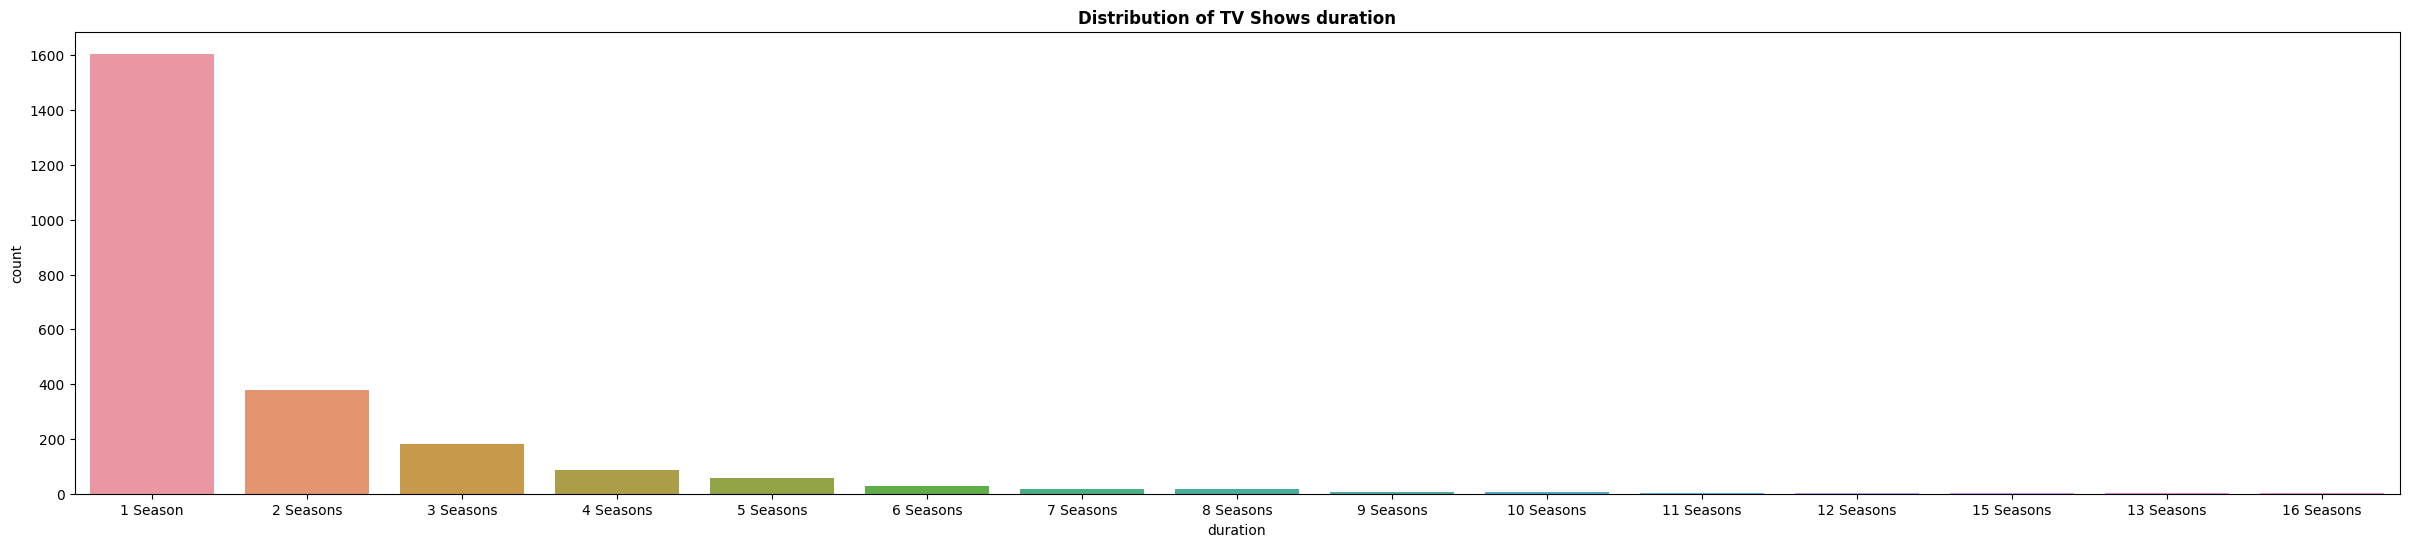

In [34]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

<b/>1. Why did you pick the specific chart?</b>

<b/>Answer Here.</b>

The chart in question is a countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons

<b/>2. What is/are the insight(s) found from the chart?</b>

<b/>Answer Here</b>

From the chart, we observed that the majority of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two, three, four, or five seasons.

<b/>3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here</b>

Yes ,Positive Impact because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning. They can allocate resources more efficiently, reduce production costs, and potentially increase the output of content.

highest number of tv_shows consistig of season1</b>





In [35]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap


country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


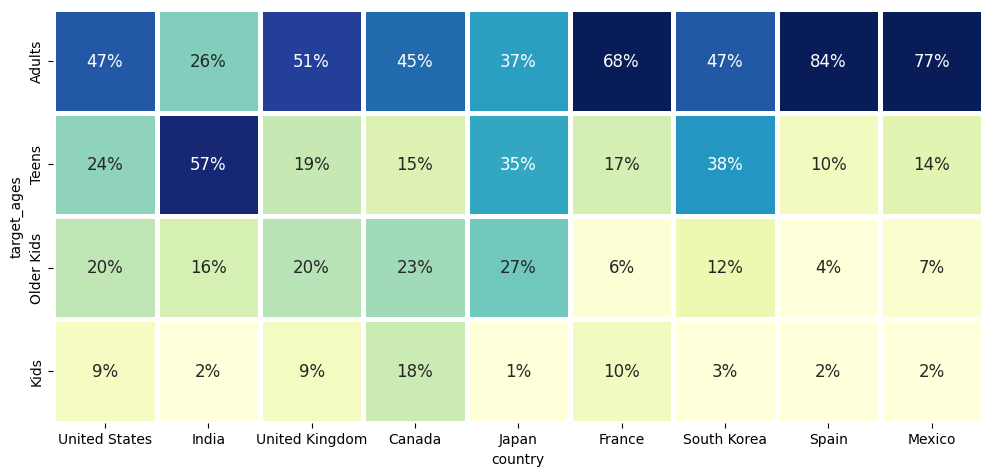

In [36]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

**The US and UK share similar target age demographics on Netflix, while India and Japan have notably distinct preferences. Additionally, Mexico and Spain offer comparable content on Netflix for varying age groups.**

###<b/>Count of Netfilx Originals</b>

In [41]:
df['date_added'] = pd.to_datetime(df['date_added'])
movies['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,target_ages,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...",Adults,1
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",Teens,1
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",[Nasty C],Adults,1
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,"[Adriano Zumbo, Rachel Khoo]",Older Kids,1


<b/>Some movies and TV shows were actually released in the past and they were added later on Netflix. But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.</b>

([<matplotlib.patches.Wedge at 0x7ebcd8411b10>,
 [Text(-0.8900699117813855, -0.6463555926434588, 'Others'),
  Text(0.9709853583069661, 0.7051151919746822, 'Originals')],
 [Text(-0.48549267915348293, -0.3525575959873411, '69.99%'),
  Text(0.5664081256790635, 0.4113171953185646, '30.01%')])

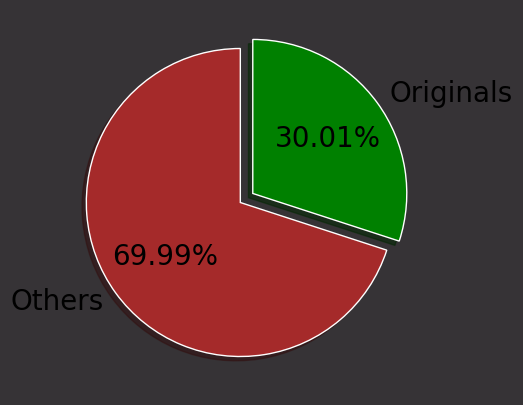

In [42]:
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['brown','green'])

<b/>Based on the information, 30% movies released on Netflix. 70% movies added on Netflix were released earlier by different mode.

#<b/>Hypothesis Testing</b>

<b/>1.HYPOTHESIS TESTING</b>

- HO: movies rated for kids and older kids are at least two hours long .
- H1:movies rated for kids and older kids are not at least two hours long.


In [44]:
movies

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,target_ages,year_added,originals
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,2016,Yes
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,2018,No
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,2017,No
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,2020,No
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...","[Amina Khalil, Ahmed Dawood, Tarek Lotfy, A...",Adults,2020,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[Tim Allen, Courteney Cox, Chevy Chase, Kat...",Older Kids,2020,No
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...",Adults,2020,No
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",Teens,2019,No
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",[Nasty C],Adults,2020,No


In [45]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,target_ages,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,1


In [46]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [47]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [48]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,target_ages,count
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,1


In [49]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [50]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [51]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [52]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [53]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

### **If the t-value falls outside the acceptable range, we reject the null hypothesis, indicating that movies aimed at kids and older kids are not a minimum of two hours in duration.**

<b/>2. HYPOTHESIS TESTING</b>

- H1:The duration which is more than 90 mins are movies

- HO:The duration which is more than 90 mins are NOT movies

In [54]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,target_ages,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,1


In [55]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

In [56]:
#head of df_
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,target_ages,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,1


In [57]:
#group_by duration and TYPE
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [58]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.330417
dtype: float64
Std  duration    1.561099
dtype: float64


In [59]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5372 2398
dof 7768
SP_2 = duration    252.749896
dtype: float64
SP duration    15.89811
dtype: float64
tvalue 249.88962005047787


In [60]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602694215408423

In [61]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602694215408418

the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

#<b/>Feature Engineering</b>

In [62]:
df.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
cast_name               object
target_ages           category
count                    int64
dtype: object

In [63]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [64]:
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [65]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [66]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [67]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [68]:
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

In [69]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [70]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [72]:
# convert X into array form for clustering
X = X_tfidf.toarray()

##<b/>Clustering Algorithms</b>

<b/>1.Kmean

Finding the optimal number of clusters using the elbow method</b>

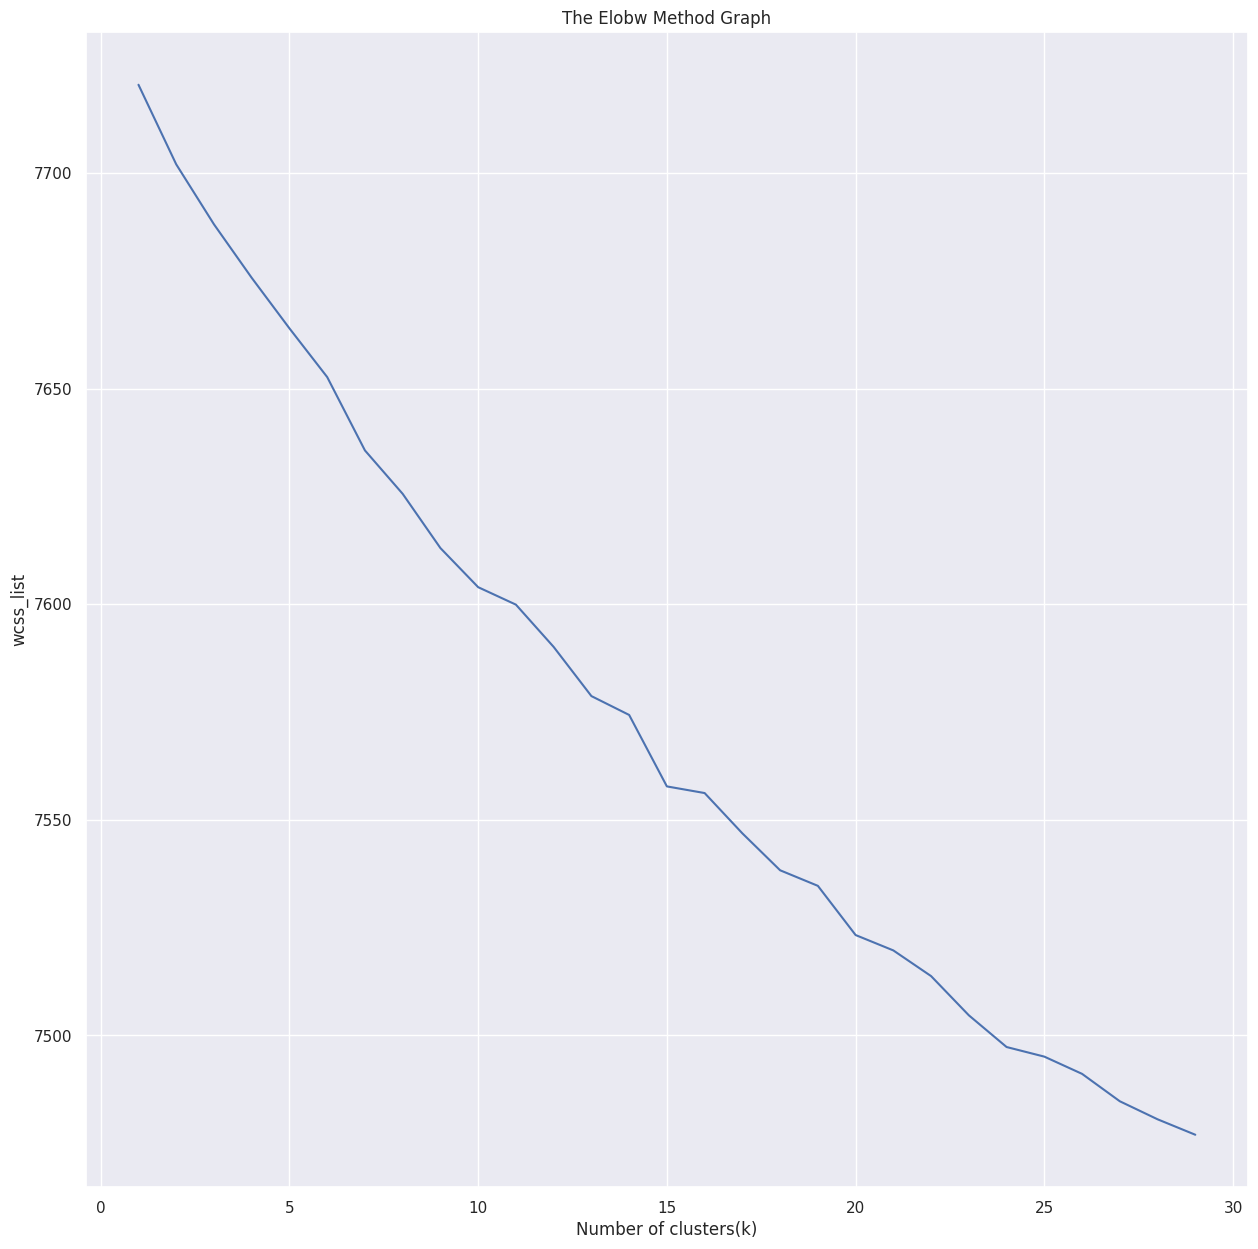

In [73]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [74]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0016
cluster: 4 	 Sillhoute: 0.0021
cluster: 5 	 Sillhoute: 0.0025
cluster: 6 	 Sillhoute: 0.0034
cluster: 7 	 Sillhoute: 0.0037
cluster: 8 	 Sillhoute: 0.0038
cluster: 9 	 Sillhoute: 0.0042
cluster: 10 	 Sillhoute: 0.0045
cluster: 11 	 Sillhoute: 0.0046
cluster: 12 	 Sillhoute: 0.0048
cluster: 13 	 Sillhoute: 0.0051
cluster: 14 	 Sillhoute: 0.0056
cluster: 15 	 Sillhoute: 0.0061
cluster: 16 	 Sillhoute: 0.0063
cluster: 17 	 Sillhoute: 0.0064
cluster: 18 	 Sillhoute: 0.0062
cluster: 19 	 Sillhoute: 0.0063
cluster: 20 	 Sillhoute: 0.0069
cluster: 21 	 Sillhoute: 0.0067
cluster: 22 	 Sillhoute: 0.0069
cluster: 23 	 Sillhoute: 0.0068
cluster: 24 	 Sillhoute: 0.0072
cluster: 25 	 Sillhoute: 0.0073
cluster: 26 	 Sillhoute: 0.0071
cluster: 27 	 Sillhoute: 0.0074
cluster: 28 	 Sillhoute: 0.0074
cluster: 29 	 Sillhoute: 0.0072


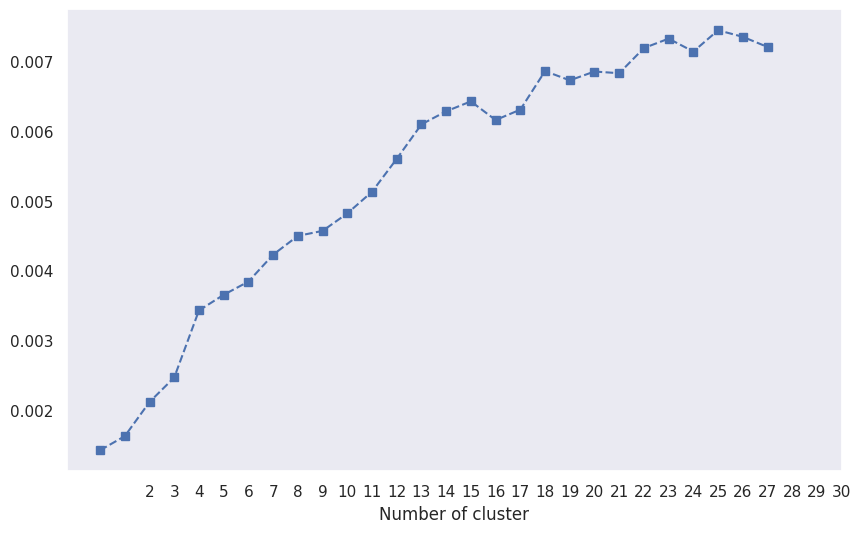

In [75]:
#Plotting Sillhoute's score
plt.figure(figsize=(10,6)) # Set the figsize to adjust the width and height of the plot
plt.plot(sill, 'bs--')
plt.xticks(list(range(2, 31)), list(range(2, 31))) # Adjusted range for tick labels
plt.grid()
plt.xlabel('Number of cluster')
plt.show()

### **Based on the analysis of the elbow method and silhouette score, it is advisable to create 26 clusters for the provided dataset. The elbow method is useful for pinpointing the ideal cluster number by assessing distortion or inertia, while the silhouette score evaluates the quality and separation of clusters. Both techniques suggest that, considering the available data, 26 clusters would be the suitable choice for this dataset.**

In [76]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

**Evaluation**

In [77]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007218341785521539


In [78]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.193799997853855

In [79]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [80]:
df['cluster'].value_counts()

3     2504
2      532
11     331
5      319
18     289
14     284
1      271
7      268
23     234
12     232
10     224
17     223
16     209
8      205
19     192
15     189
21     175
4      158
0      155
24     150
22     140
9      138
20     108
25      89
13      79
6       72
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

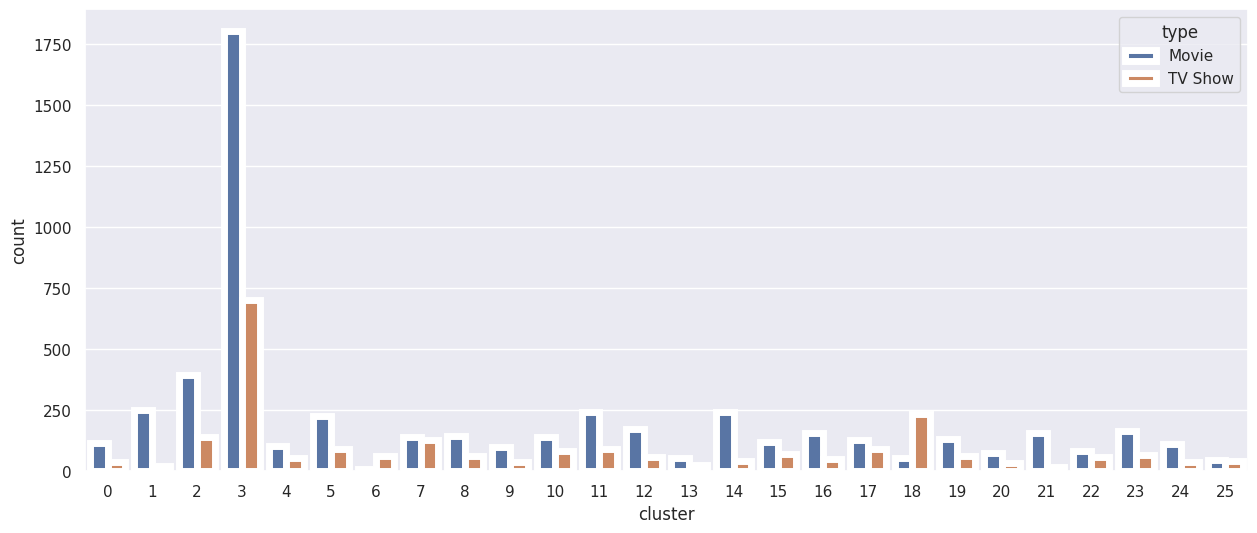

In [81]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

In [82]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

**According to the analysis, it is evident that cluster 3 has the largest number of data points in comparison to the other clusters. This suggests that a substantial portion of the dataset is associated with cluster 3, implying the presence of distinct characteristics or patterns that shed light on the specific attributes or behaviors of the data points within this cluster.**

**Dendogram**

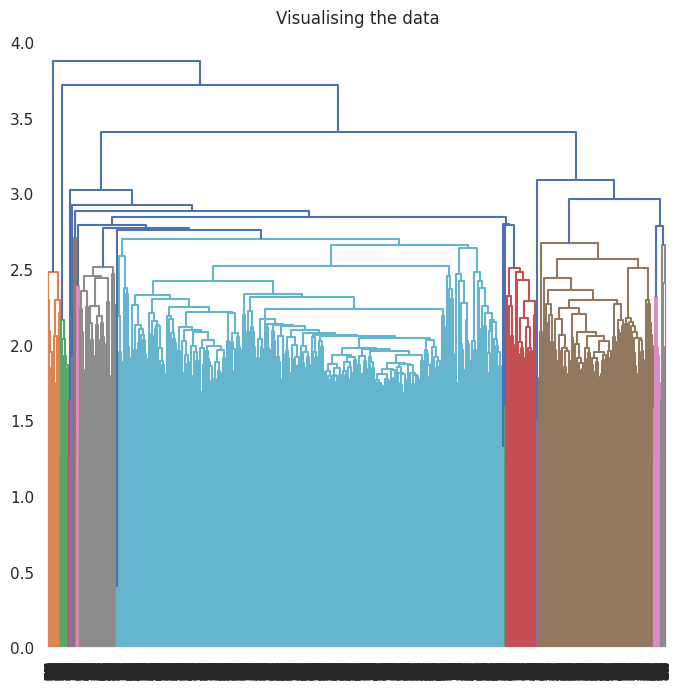

In [83]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

<b/>2.AgglomerativeClustering</b>

In [84]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [85]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,target_ages,count,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,1,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,1,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,1,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,1,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,1,0


**Evaluation**

In [86]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.002


In [87]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

13.979382092977453

###<b/>Seaborn scatterplot of the cluster</b>

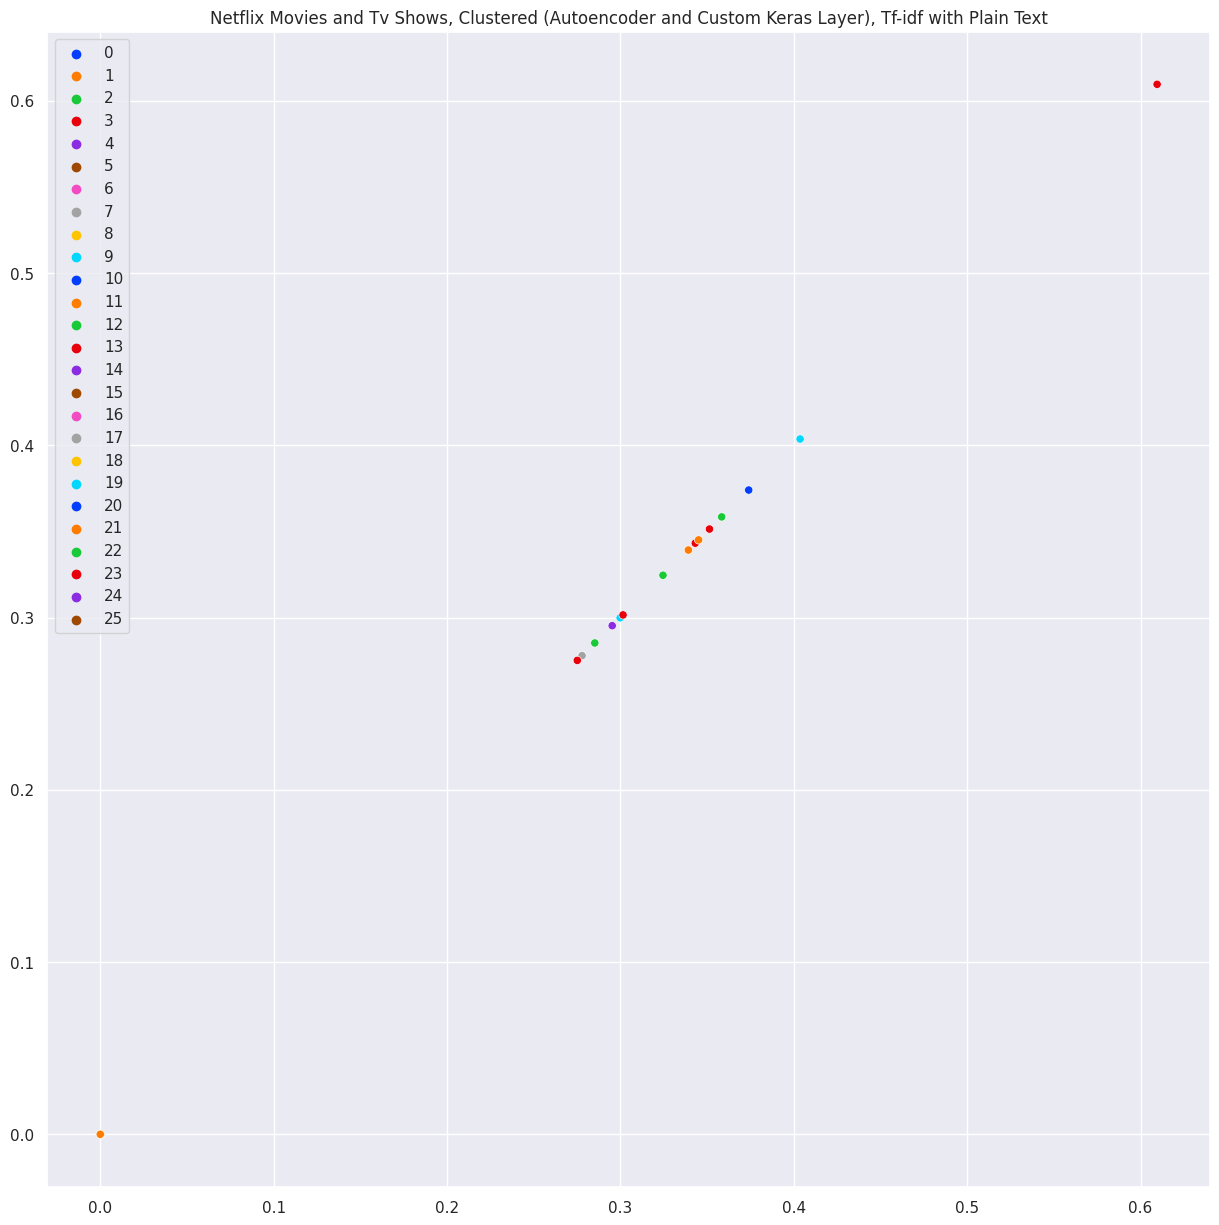

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_predict)))

# plot
sns.scatterplot(x=X[:, 1], y=X[:, 1], hue=y_predict, palette=palette)
plt.title("Netflix Movies and Tv Shows, Clustered (Autoencoder and Custom Keras Layer), Tf-idf with Plain Text")
plt.savefig('output2.png')
plt.show()


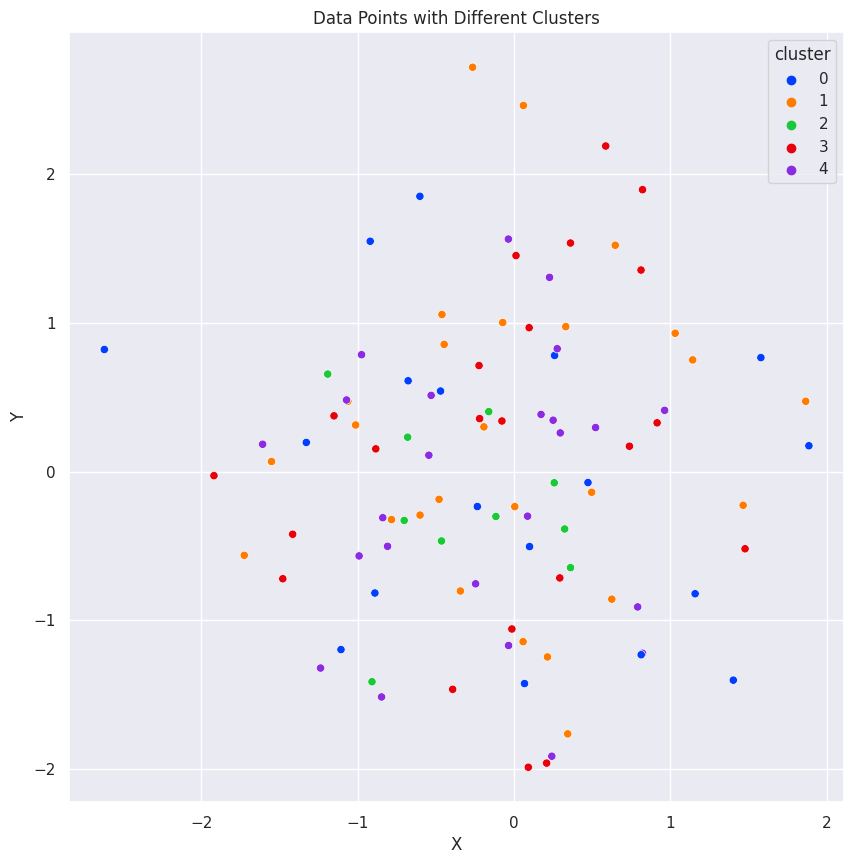

In [89]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

#Generate random data for demonstrate and replace this section with your own data

np.random.seed(42)
data=np.random.randn(100, 2)
clusters = np.random.randint(0,5, size=100)

# convert data to DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])
df['cluster'] = clusters

# sns setting
sns.set(rc={'figure.figsize':(10, 10)})

# colors
palette = sns.color_palette("bright", len(set(df['cluster'])))

# plot
sns.scatterplot(x='X', y='Y', hue='cluster', data=df, palette=palette)
plt.title("Data Points with Different Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title='cluster', loc='best')
plt.show()

#<b/>Conclusion</b>

- After evaluating elbow and silhouette scores, the optimal cluster count is determined to be 26. K-Means clustering is favored over hierarchical clustering, with K-Means Cluster 0 containing the highest number of data points, while other clusters exhibit uniform distribution.

- On Netflix, there are 5,372 movies and 2,398 TV shows, with movies outnumbering TV shows.

- "TV-MA," representing adult ratings, garners the highest number of ratings among TV shows, indicating its popularity on Netflix.

- The years 2017, 2018, and 2020 saw the highest numbers of movie releases on Netflix. Movie content has seen more significant growth than TV shows, with a substantial increase since 2015 and a drop after 2020.

- The period from October to January witnesses the highest influx of content additions to Netflix.

- Documentaries are the most popular genre on Netflix, followed by stand-up comedy, dramas, and international movies. In TV shows, kids' TV is the top genre.

- Most movies on Netflix have runtimes between 50 and 150 minutes, offering a wide range of viewing options.

- The majority of TV shows consist of a single season.

- Movies rated NC-17 have the longest average duration, while movies with a TV-Y rating have the shortest runtime.

- The United States has the most content on Netflix, followed by India.

- India has the highest number of movies on Netflix.

- 30% of the content on Netflix consists of movies, while 70% of the movies added were previously released through different channels.